In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
filename = 'KaggleV2-May-2016_join_with_weather_may5_1338.csv'
no_show = pd.read_csv(filename, encoding='latin')

In [3]:
pd.set_option("display.max_columns",101)

In [4]:
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_d,time_d_total_seconds,a_day_of_week,s_day_of_week,Neighbourhood_category,Gender_category,no_show,scheduled_hour,time_d_total_days,minpressurem,minhumidity,maxtempi,mintempi,maxpressurei,precipm,mindewptm,meanwindspdm,meandewpti,mintempm,maxhumidity,maxpressurem,meantempm,precipi,meanwdire,maxwspdi,humidity,minpressurei,maxdewpti,maxtempm,mindewpti,meandewptm,meanwindspdi,meanwdird,maxwspdm,maxdewptm,meantempi,date_tzname,date_mon,date_hour,date_min,date_year,date_pretty,date_mday,datetime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52.000000000,-67088.0,4,4,39,0,False,18,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33.000000000,-58107.0,4,4,39,1,False,16,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56.000000000,-58744.0,4,4,45,0,False,16,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29
3,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29.000000000,-62971.0,4,4,54,0,False,17,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29
4,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37.000000000,-58043.0,4,4,39,0,False,16,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29


In [5]:
no_show.count()

PatientId                 110527
AppointmentID             110527
Gender                    110527
ScheduledDay              110527
AppointmentDay            110527
Age                       110527
Neighbourhood             110527
Scholarship               110527
Hipertension              110527
Diabetes                  110527
Alcoholism                110527
Handcap                   110527
SMS_received              110527
No-show                   110527
time_d                    110527
time_d_total_seconds      110527
a_day_of_week             110527
s_day_of_week             110527
Neighbourhood_category    110527
Gender_category           110527
no_show                   110527
scheduled_hour            110527
time_d_total_days         110527
minpressurem              106248
minhumidity               106248
maxtempi                  106248
mintempi                  106248
maxpressurei              106248
precipm                   106248
mindewptm                 106248
meanwindsp

In [6]:
print(no_show.no_show.sum())
print(no_show.no_show.count())

22319
110527


In [7]:
prob_show = 1.0 - no_show.no_show.sum() / float(no_show.no_show.count())
prob_show

0.798067440534892

In [8]:
no_show['time_d_total_hours'] = no_show['time_d_total_seconds']/(60.0*60.0)

In [9]:
feature_set = ['Age', 'Scholarship', 'Hipertension', 'Neighbourhood_category', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', \
            'Gender_category', 'scheduled_hour', 's_day_of_week', 'a_day_of_week', 'time_d_total_seconds','maxtempi','precipi','maxwspdi','minpressurei']



In [10]:
dd = no_show[feature_set + ['no_show']]

In [11]:
dd_dna = dd.dropna()

In [12]:
dd_dna.count()

Age                       106248
Scholarship               106248
Hipertension              106248
Neighbourhood_category    106248
Diabetes                  106248
Alcoholism                106248
Handcap                   106248
SMS_received              106248
Gender_category           106248
scheduled_hour            106248
s_day_of_week             106248
a_day_of_week             106248
time_d_total_seconds      106248
maxtempi                  106248
precipi                   106248
maxwspdi                  106248
minpressurei              106248
no_show                   106248
dtype: int64

In [13]:
prob_show = 1.0 - no_show.no_show.sum() / float(no_show.no_show.count())
prob_show

0.798067440534892

In [14]:

tree_depth = [2,3,4]
num_trees = [10, 20, 50, 100]
no_show_weight = 4  #what's a good value for this? 
class_weight = {0:1,1:no_show_weight}
class_weight = None
max_features = None #auto = sqrt(N) or None= N, where N = len(features)
fold_count = 10


In [15]:
X = dd_dna.as_matrix(columns=feature_set)
y = dd_dna['no_show'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [16]:
clf = RandomForestClassifier(n_estimators = 50, max_features = None, max_depth = 3, class_weight=class_weight)

In [17]:
#fold_count = 5
#scores = cross_val_score(clf, X, y, cv=fold_count) 

In [18]:
scores

NameError: name 'scores' is not defined

In [19]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

misclassified_points = (y_test != y_pred).sum()
accuracy = (X_test.shape[0] - float(misclassified_points)) / X_test.shape[0]*100
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
auc = roc_auc_score(y_test, y_proba[:,1])


In [20]:
print('accuracy = {}'.format(accuracy))
print('tree = {}'.format(clf))
print('AUC = {}'.format(auc))
print('feature count = {}'.format(len(feature_set)))
print('feature set = {}'.format(feature_set))


accuracy = 79.69882352941177
tree = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
AUC = 0.7232567878329588
feature count = 17
feature set = ['Age', 'Scholarship', 'Hipertension', 'Neighbourhood_category', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Gender_category', 'scheduled_hour', 's_day_of_week', 'a_day_of_week', 'time_d_total_seconds', 'maxtempi', 'precipi', 'maxwspdi', 'minpressurei']


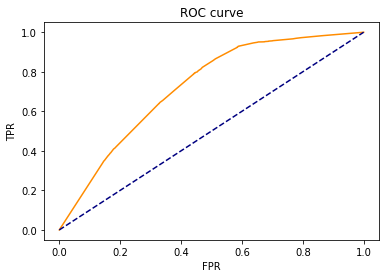

In [21]:
plt.clf()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [22]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None) 
graph = graphviz.Source(dot_data) 

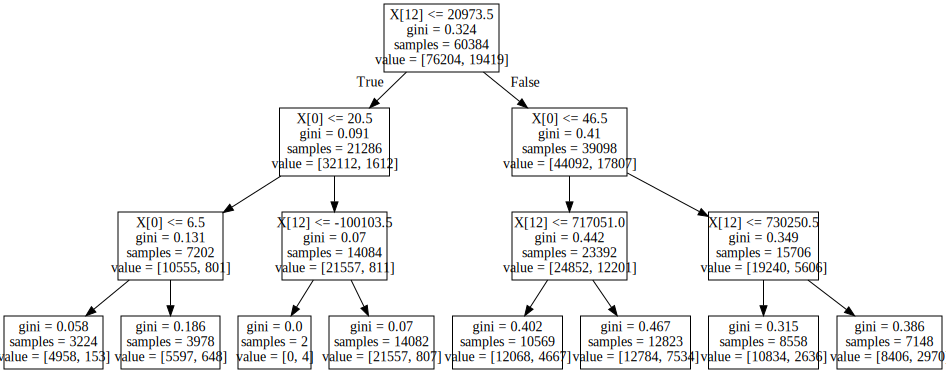

In [23]:
graph

In [24]:
clf.feature_importances_

array([1.13257267e-01, 0.00000000e+00, 0.00000000e+00, 3.09830178e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.86698473e-01, 0.00000000e+00, 0.00000000e+00, 1.32767530e-05,
       0.00000000e+00])

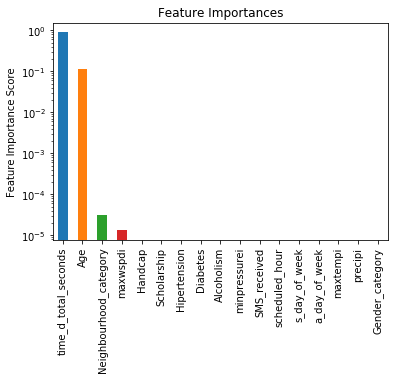

In [25]:
feat_imp = pd.Series(clf.feature_importances_, feature_set).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.semilogy()
plt.show()

In [64]:
class randomClassifier(object):
    
    def __init__(self, threshold = 0.5):
        self.threshold = threshold
    
    def fit(self, X, Y):
        return self
    
    def predict(self, predict_proba):
        '''
        don't pass in X_test!
        '''
        return predict_proba[:,0] < self.threshold
        
    def predict_proba(self, X):
        N = X.shape[0]
        y_0 = np.random.rand(N)
        return np.vstack((y_0, 1.0 - y_0)).T

accuracy = 65.91379634857896
tree = RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
            criterion='entropy', max_depth=4, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
AUC = 0.7400514951464987
feature count = 17
feature set = ['Age', 'Scholarship', 'Hipertension', 'Neighbourhood_category', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Gender_category', 'scheduled_hour', 's_day_of_week', 'a_day_of_week', 'time_d_total_hours', 'maxtempi', 'precipi', 'maxwspdi', 'minpressurei']


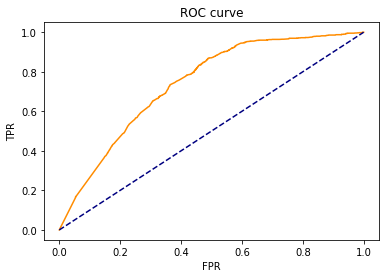

In [90]:
#make max_depth = 4
feature_set = ['Age', 'Scholarship', 'Hipertension', 'Neighbourhood_category', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', \
            'Gender_category', 'scheduled_hour', 's_day_of_week', 'a_day_of_week', 'time_d_total_hours','maxtempi','precipi','maxwspdi','minpressurei']

dd = no_show[feature_set + ['no_show']]
dd_dna = dd.dropna()

X = dd_dna.as_matrix(columns=feature_set)
y = dd_dna['no_show'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

tree_depth = [2,3,4]
num_trees = [10, 20, 50, 100]
no_show_weight = 3  #what's a good value for this? 
class_weight = {0:1,1:no_show_weight}
#class_weight = None
max_features = None #auto = sqrt(N) or None= N, where N = len(features)
fold_count = 10

clf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_features = None, max_depth = 4, class_weight=class_weight)
#clf = randomClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

misclassified_points = (y_test != y_pred).sum()
accuracy = (X_test.shape[0] - float(misclassified_points)) / X_test.shape[0]*100
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
auc = roc_auc_score(y_test, y_proba[:,1])

print('accuracy = {}'.format(accuracy))
print('tree = {}'.format(clf))
print('AUC = {}'.format(auc))
print('feature count = {}'.format(len(feature_set)))
print('feature set = {}'.format(feature_set))


plt.clf()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

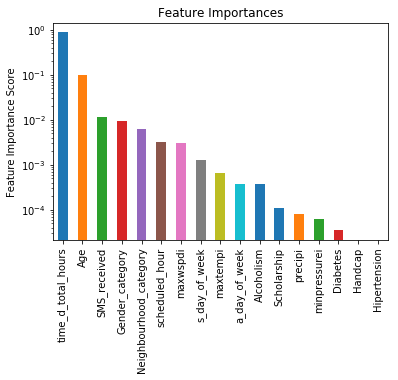

In [91]:
feat_imp = pd.Series(clf.feature_importances_, feature_set).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.semilogy()
plt.show()

In [92]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,
                               feature_names=feature_set,  
                         class_names=['Show', 'No-Show'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 

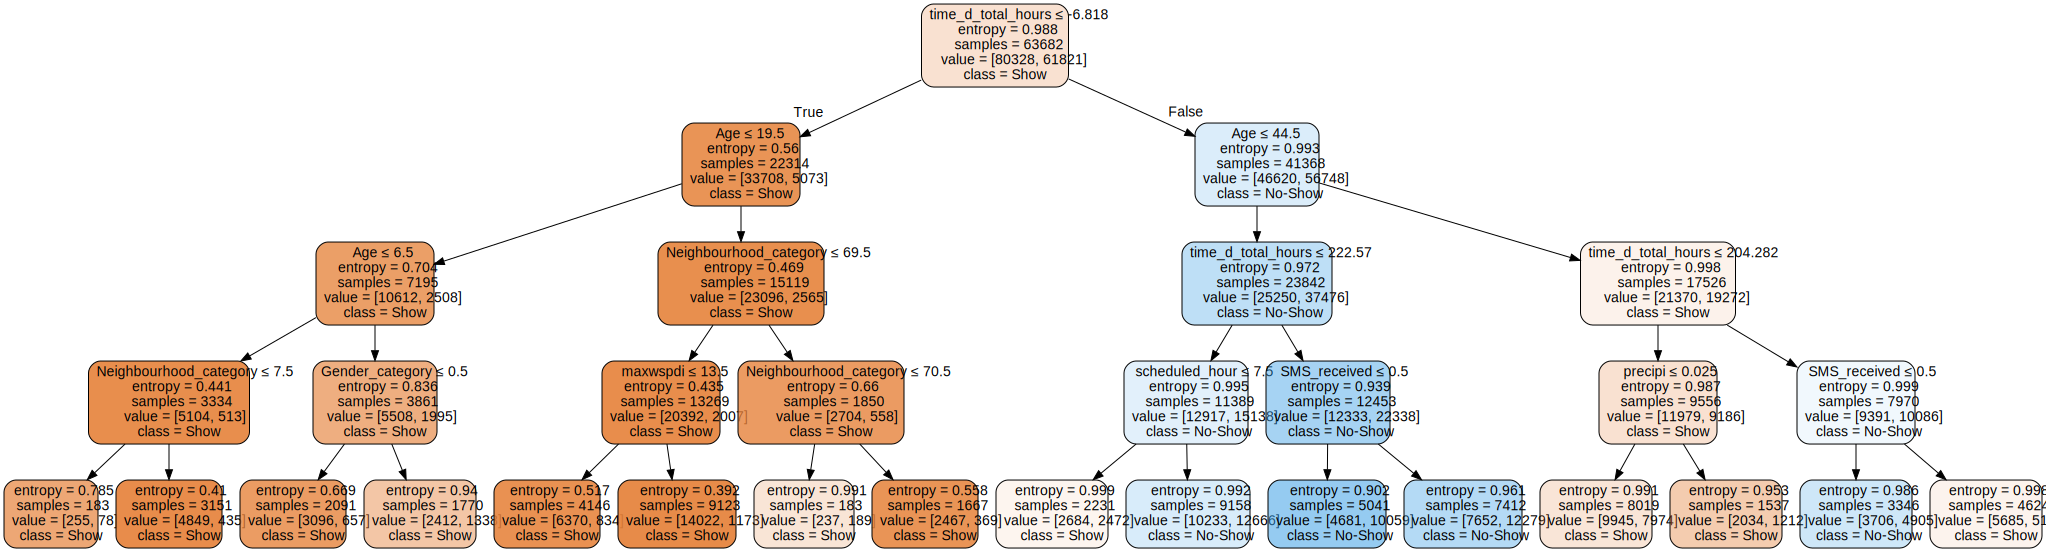

In [93]:
graph

In [98]:
def accuracy_metrics(actual, predicted):
    """ Calculate the accuracy metrics from arrays of actual and predicted results
    """
    if len(actual) != len(predicted):
        raise Exception('Size of predicted and actual arrays differ')

    # Step through the arrays and calculate true positive, false negative, false positive, true negative
    tp = tn = fp = fn = 0

    for ix, actual_value in enumerate(actual):
        predicted_value = predicted[ix]

        if actual_value:
            if predicted_value:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_value:
                fp += 1
            else:
                tn += 1

    # use the result above to calculate the stats and create the matrix.
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    if (tp + fp) > 0:
        precision = tp / (tp + fp)
    else:
        precision = 0
    confusion = [[tp, fn], [fp, tn]]

    return precision, recall, accuracy, confusion

In [99]:
print(accuracy_metrics(y_test, y_pred))

(0.3280614550384094, 0.6914285714285714, 0.6591379634857896, [[726, 324], [1487, 2776]])


In [100]:
_, _, _, conf = accuracy_metrics(y_test, y_pred)

In [101]:
conf

[[726, 324], [1487, 2776]]

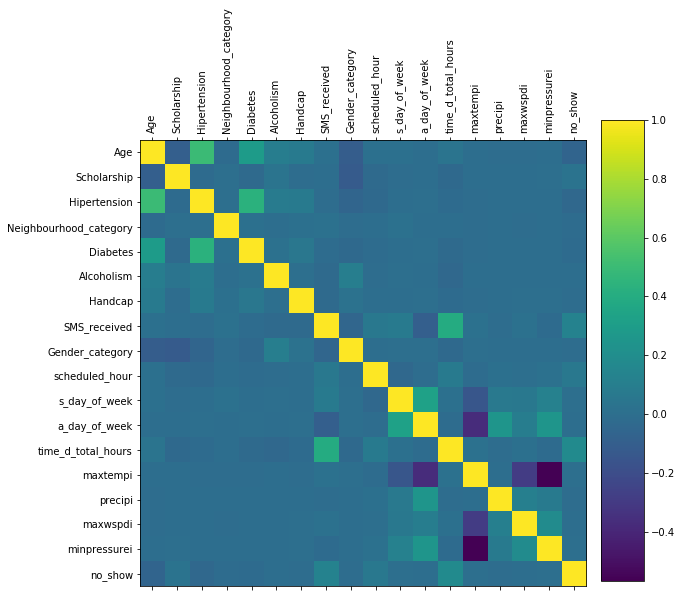

In [82]:
corr = dd.corr()

plt.figure(figsize=(8,8))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [141]:
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_d,time_d_total_seconds,a_day_of_week,s_day_of_week,Neighbourhood_category,Gender_category,no_show,scheduled_hour,time_d_total_days,minpressurem,minhumidity,maxtempi,mintempi,maxpressurei,precipm,mindewptm,meanwindspdm,meandewpti,mintempm,maxhumidity,maxpressurem,meantempm,precipi,meanwdire,maxwspdi,humidity,minpressurei,maxdewpti,maxtempm,mindewpti,meandewptm,meanwindspdi,meanwdird,maxwspdm,maxdewptm,meantempi,date_tzname,date_mon,date_hour,date_min,date_year,date_pretty,date_mday,datetime,time_d_total_hours
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52.000000000,-67088.0,4,4,39,0,False,18,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29,-18.635556
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33.000000000,-58107.0,4,4,39,1,False,16,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29,-16.140833
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56.000000000,-58744.0,4,4,45,0,False,16,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29,-16.317778
3,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29.000000000,-62971.0,4,4,54,0,False,17,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29,-17.491944
4,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37.000000000,-58043.0,4,4,39,0,False,16,0,1015.1,77.0,74.1,70.9,30.09,0.3,18.0,14.7,66.2,21.6,87.0,1018.8,22.5,0.01,SSW,24.0,81.0,29.98,68.5,23.4,64.4,19.0,9.1,NaN,38.6,20.3,72.5,America/Sao_Paulo,4.0,0.0,0.0,2016.0,"April 29, 2016",29.0,2016-04-29,-16.123056


In [ ]:
no_show.groupby